**Detection, Segmentation, and 3D Pose Estimation of Surgical Tools Using Deep Convolutional Neural Networks and Algebraic Geometry**

Article link: https://www.sciencedirect.com/science/article/abs/pii/S1361841521000402


* This code is written by 
        ** Md. Kamrul Hasan 
        ** Medical Imaging and Applications (MAIA)
        ** Erasmus Scholar [2017-2019] 
        ** Contact: kamruleeekuet@gmail.com
        
        
* The outputs of the ART-Net for the test images will be generated from this notebook. The outputs are: <br>

&emsp; &emsp; &emsp; 1. Detection sub-network for the tool presence identification.  <br>
&emsp; &emsp; &emsp; 2. Segmentation sub-network for getting the surgical instrument masks.  <br>
&emsp; &emsp; &emsp; 3. Regression sub-network-1 for edgeLine (tool boundary) extraction.  <br>
&emsp; &emsp; &emsp; 4. Regression sub-network-2 for midLine extraction. <br>
&emsp; &emsp; &emsp; 5. Regression sub-network-3 for toolTip extraction.  <br>

## Configure GPU 


In [1]:
import tensorflow as tf 
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Import packages

In [2]:
import numpy as np 
import os
import cv2
import skimage.io as io
import skimage.transform as trans
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as keras
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.models import model_from_yaml

from __future__ import print_function
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import os
import glob
import cv2
import glob
import itertools
import skimage.io as io
import skimage.transform as trans
from tensorflow.keras.initializers import Constant

from matplotlib import pyplot as plt
%matplotlib inline

from skimage.morphology import disk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import jaccard_similarity_score

## Load model and Weights

In [4]:
#-----------------------------------Create ART-Net Model----------------------------------------------------

# Load (Read) the model which saved as yaml file. 
yaml_file = open('modelSaved.yaml', 'r')  
# "modelSaved.yaml" is the file name and should be in the same directory of this notebook script. 

loaded_model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(loaded_model_yaml)
# model.summary() #If you want to see the model summary then uncomment this. Uncomment is preferable. 


#------------------------Load the traiend Weight to the ART-Net Model---------------------------------------
model.load_weights("/home/mahmoud/Desktop/laparoscopic-Tools-Segmentation/Models/FullTraining/ModelLR1/fullmodel25-5-2021.h5")
# "FineTunedmodel.hdf5" is the saved weights and should be in the same directory of this notebook script. 


## Predict the Outputs

1/1 [==============================] - 32s 32s/step


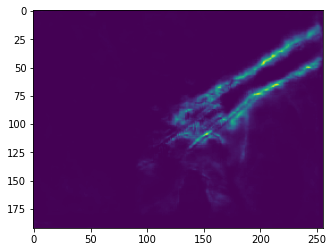

1/1 [==============================] - 0s 16ms/step


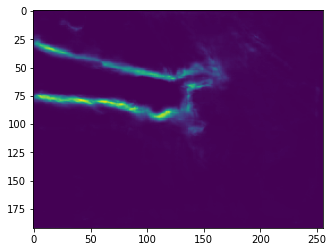

1/1 [==============================] - 0s 16ms/step


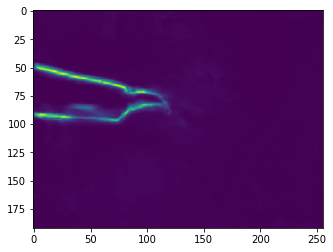

1/1 [==============================] - 0s 16ms/step


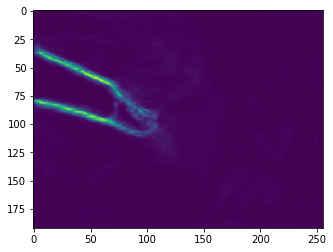

1/1 [==============================] - 0s 15ms/step


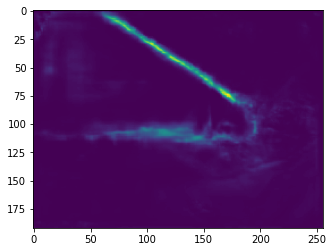

1/1 [==============================] - 0s 15ms/step


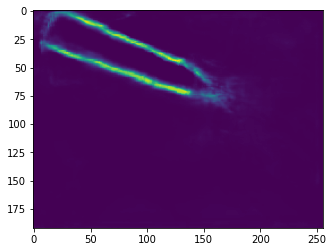

1/1 [==============================] - 0s 15ms/step


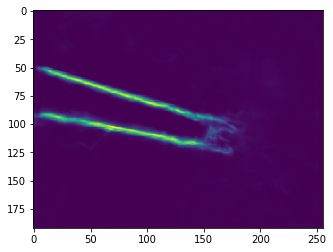

1/1 [==============================] - 0s 16ms/step


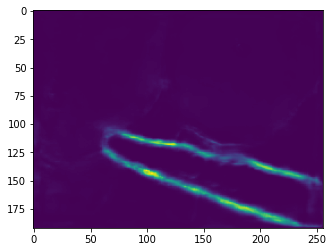

1/1 [==============================] - 0s 15ms/step


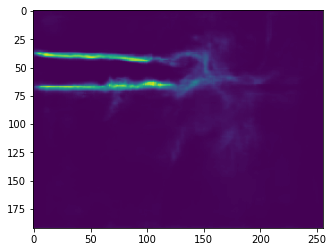

1/1 [==============================] - 0s 15ms/step


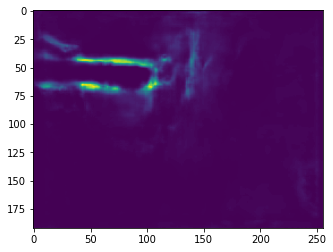

1/1 [==============================] - 0s 15ms/step


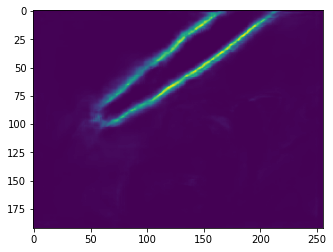

1/1 [==============================] - 0s 15ms/step


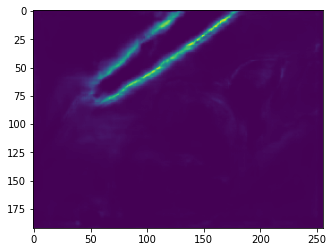

1/1 [==============================] - 0s 15ms/step


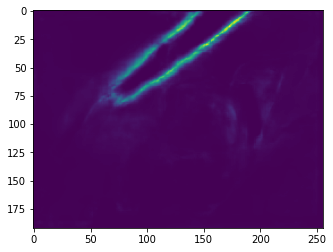

1/1 [==============================] - 0s 15ms/step


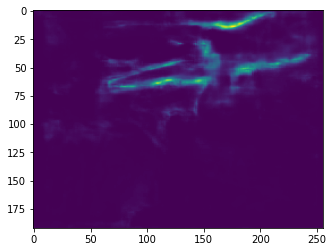

1/1 [==============================] - 0s 15ms/step


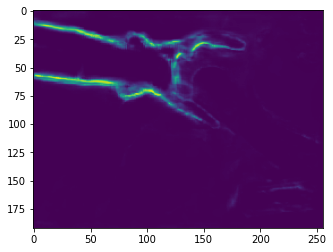

1/1 [==============================] - 0s 15ms/step


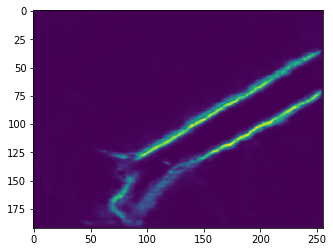

1/1 [==============================] - 0s 15ms/step


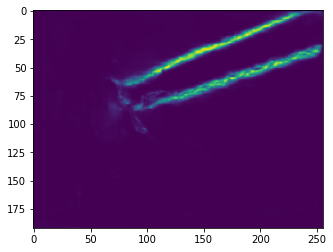

1/1 [==============================] - 0s 15ms/step


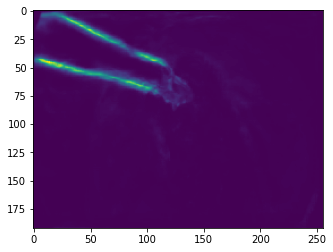

1/1 [==============================] - 0s 15ms/step


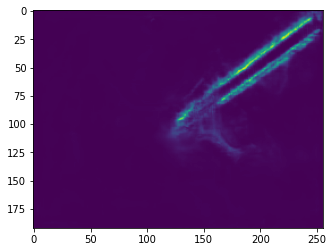

1/1 [==============================] - 0s 15ms/step


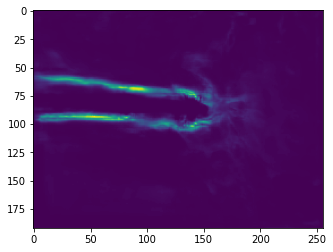

1/1 [==============================] - 0s 15ms/step


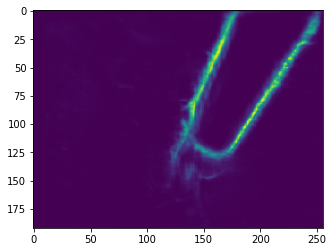

1/1 [==============================] - 0s 15ms/step


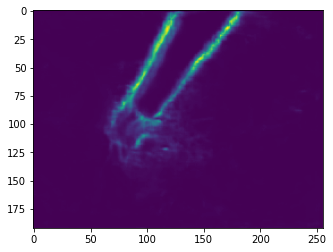

1/1 [==============================] - 0s 15ms/step


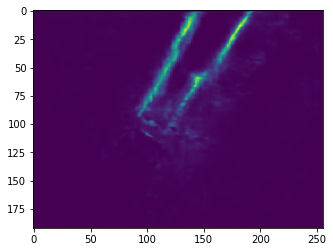

1/1 [==============================] - 0s 15ms/step


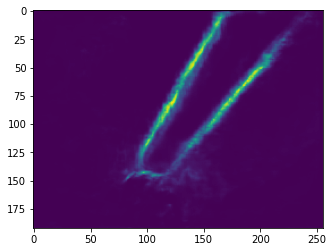

1/1 [==============================] - 0s 15ms/step


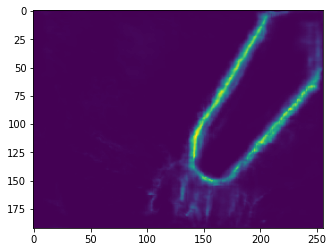

1/1 [==============================] - 0s 15ms/step


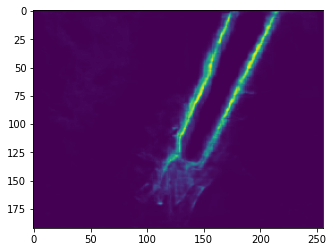

1/1 [==============================] - 0s 15ms/step


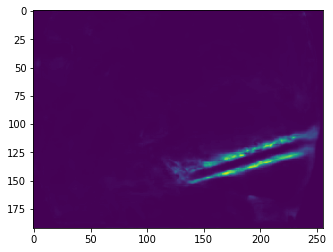

1/1 [==============================] - 0s 16ms/step


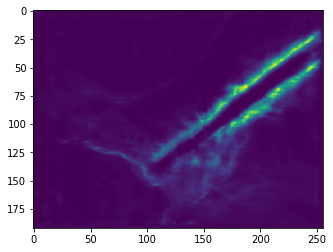

1/1 [==============================] - 0s 17ms/step


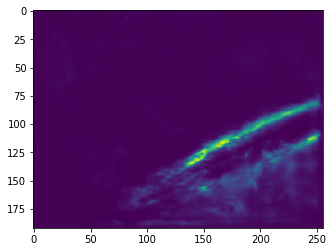

1/1 [==============================] - 0s 16ms/step


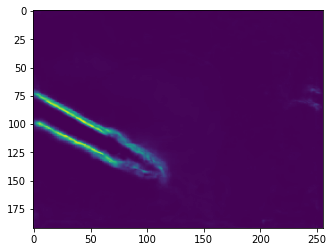

1/1 [==============================] - 0s 16ms/step


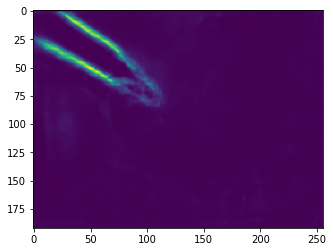

1/1 [==============================] - 0s 15ms/step


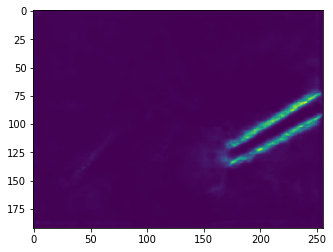

1/1 [==============================] - 0s 18ms/step


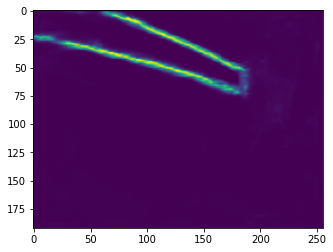

1/1 [==============================] - 0s 21ms/step


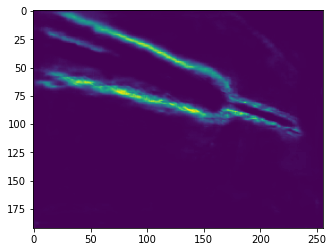

1/1 [==============================] - 0s 21ms/step


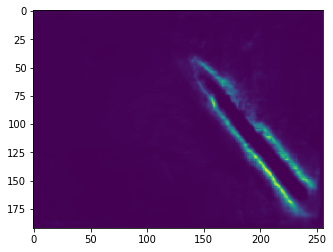

1/1 [==============================] - 0s 16ms/step


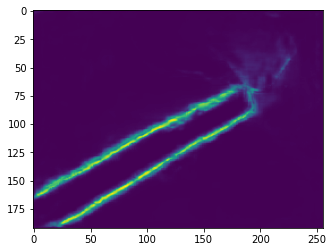

1/1 [==============================] - 0s 15ms/step


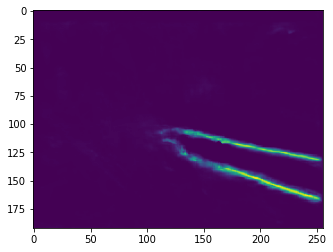

1/1 [==============================] - 0s 15ms/step


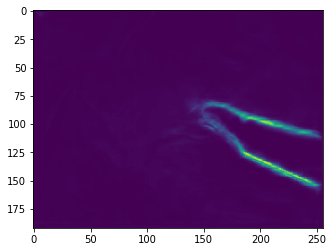

1/1 [==============================] - 0s 15ms/step


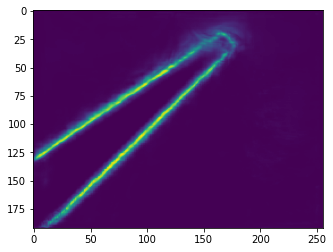

1/1 [==============================] - 0s 15ms/step


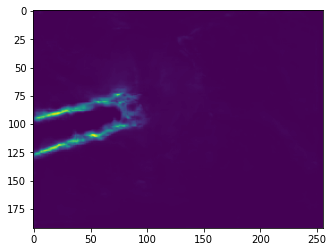

1/1 [==============================] - 0s 15ms/step


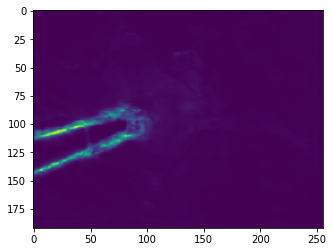

1/1 [==============================] - 0s 16ms/step


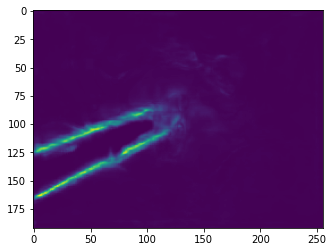

1/1 [==============================] - 0s 16ms/step


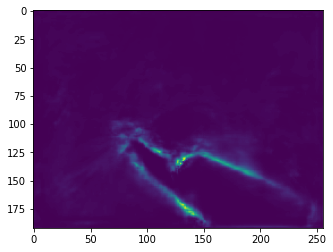

1/1 [==============================] - 0s 15ms/step


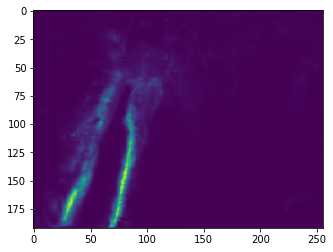

1/1 [==============================] - 0s 15ms/step


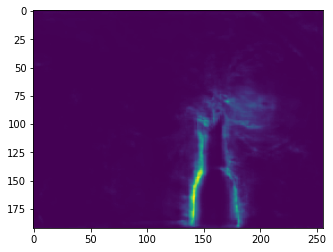

1/1 [==============================] - 0s 21ms/step


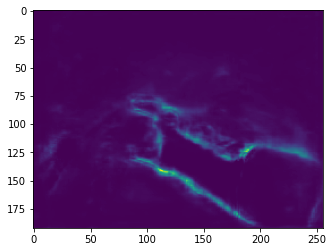

1/1 [==============================] - 0s 20ms/step


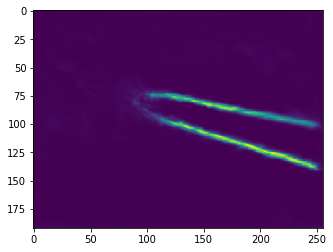

1/1 [==============================] - 0s 15ms/step


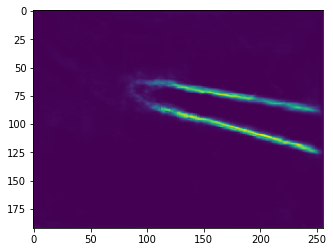

1/1 [==============================] - 0s 16ms/step


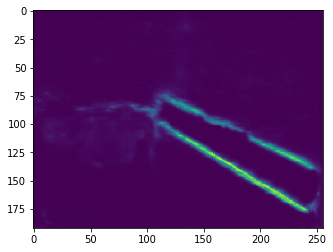

1/1 [==============================] - 0s 15ms/step


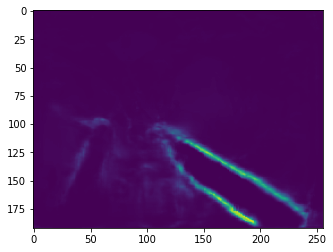

1/1 [==============================] - 0s 15ms/step


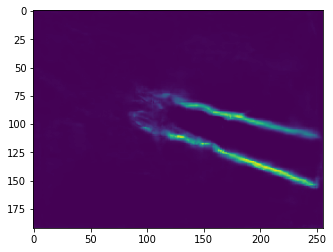

1/1 [==============================] - 0s 16ms/step


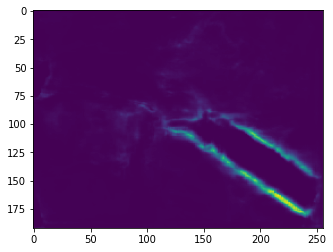

1/1 [==============================] - 0s 15ms/step


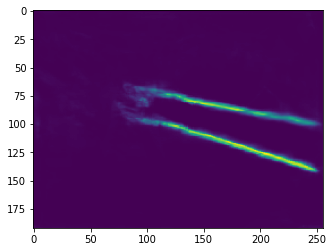

1/1 [==============================] - 0s 15ms/step


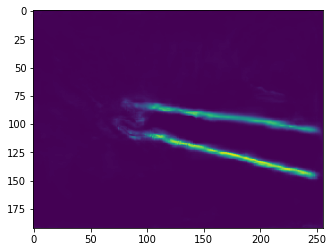

1/1 [==============================] - 0s 15ms/step


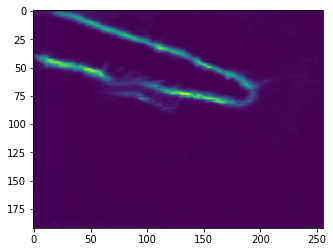

1/1 [==============================] - 0s 15ms/step


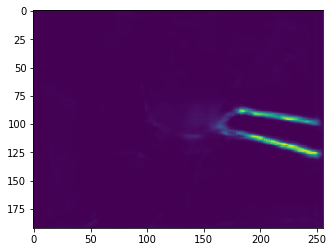

1/1 [==============================] - 0s 15ms/step


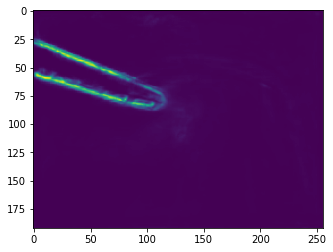

1/1 [==============================] - 0s 15ms/step


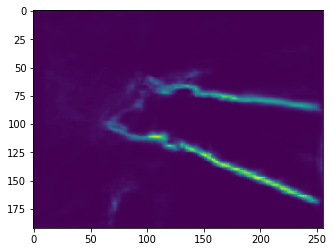

1/1 [==============================] - 0s 15ms/step


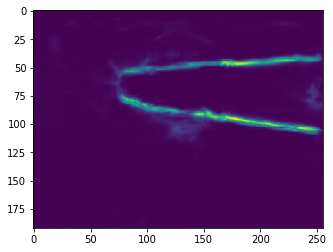

1/1 [==============================] - 0s 15ms/step


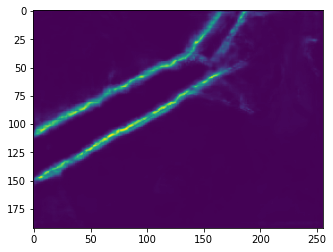

1/1 [==============================] - 0s 15ms/step


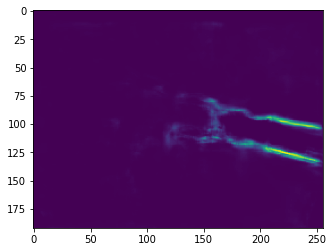

1/1 [==============================] - 0s 15ms/step


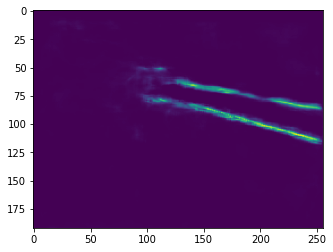

1/1 [==============================] - 0s 16ms/step


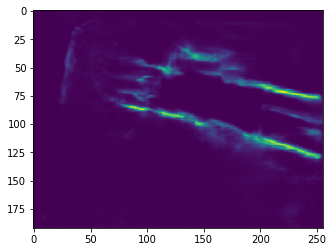

1/1 [==============================] - 0s 15ms/step


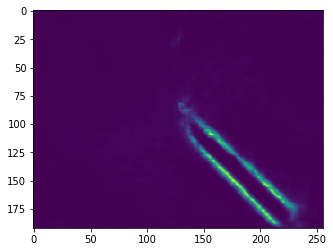

1/1 [==============================] - 0s 15ms/step


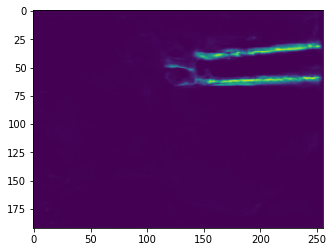

1/1 [==============================] - 0s 15ms/step


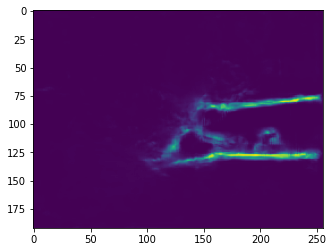

1/1 [==============================] - 0s 15ms/step


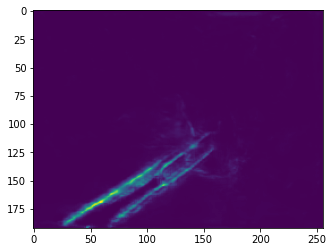

1/1 [==============================] - 0s 15ms/step


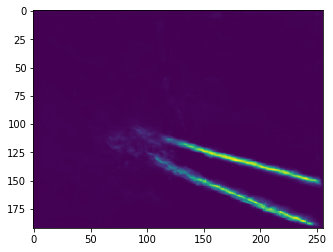

1/1 [==============================] - 0s 15ms/step


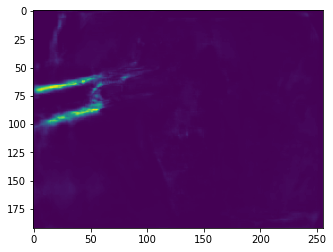

1/1 [==============================] - 0s 16ms/step


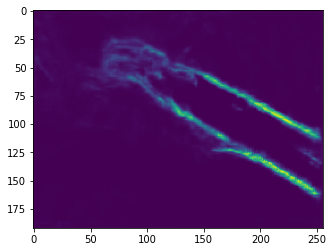

1/1 [==============================] - 0s 19ms/step


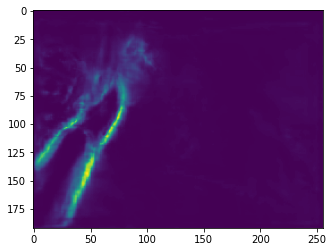

1/1 [==============================] - 0s 18ms/step


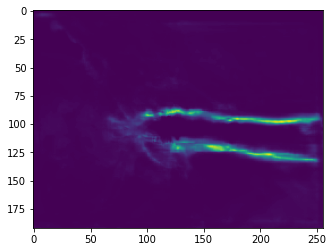

1/1 [==============================] - 0s 25ms/step


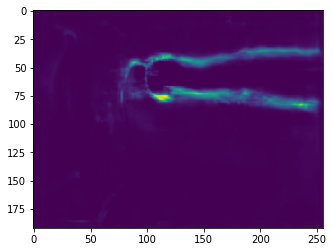

1/1 [==============================] - 0s 17ms/step


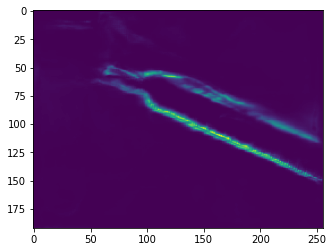

1/1 [==============================] - 0s 16ms/step


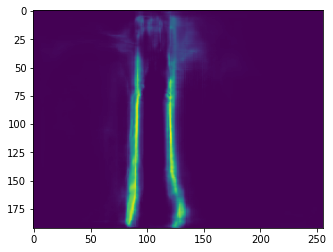

1/1 [==============================] - 0s 16ms/step


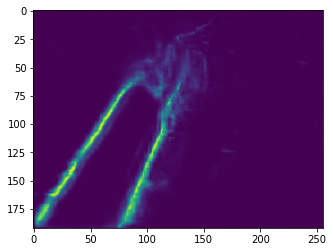

1/1 [==============================] - 0s 16ms/step


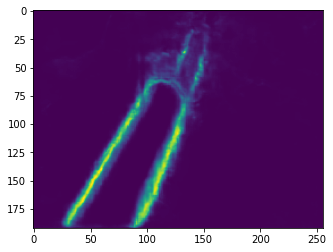

1/1 [==============================] - 0s 16ms/step


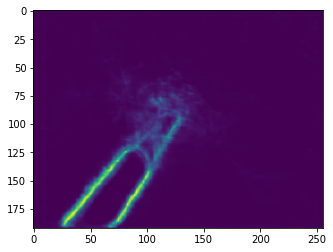

1/1 [==============================] - 0s 15ms/step


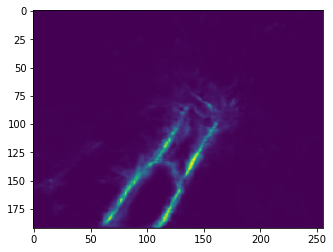

1/1 [==============================] - 0s 16ms/step


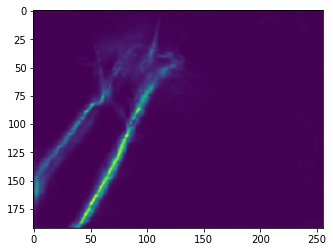

1/1 [==============================] - 0s 16ms/step


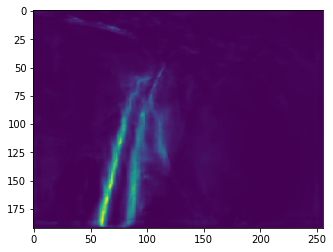

1/1 [==============================] - 0s 15ms/step


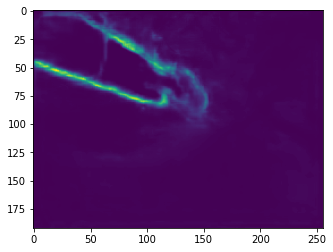

1/1 [==============================] - 0s 15ms/step


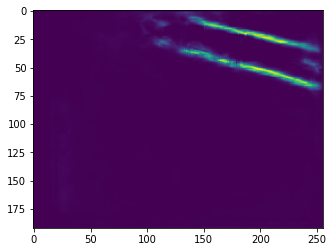

1/1 [==============================] - 0s 16ms/step


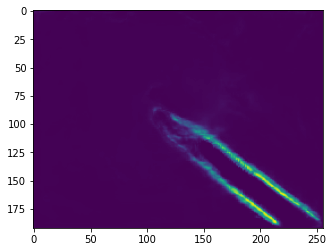

1/1 [==============================] - 0s 16ms/step


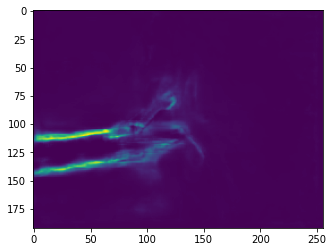

1/1 [==============================] - 0s 16ms/step


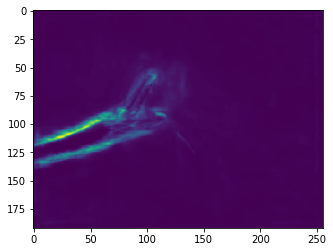

1/1 [==============================] - 0s 15ms/step


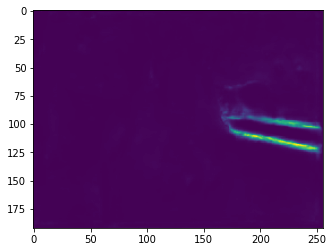

1/1 [==============================] - 0s 15ms/step


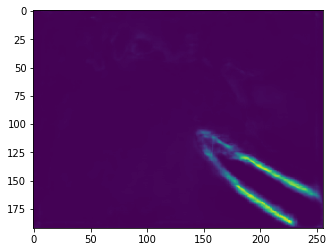

1/1 [==============================] - 0s 16ms/step


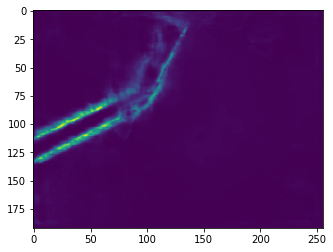

1/1 [==============================] - 0s 16ms/step


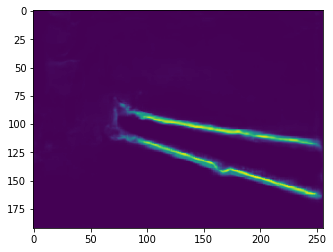

1/1 [==============================] - 0s 16ms/step


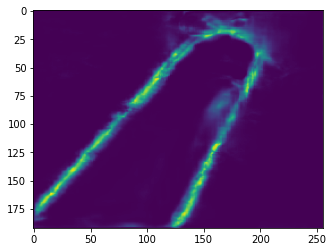

1/1 [==============================] - 0s 16ms/step


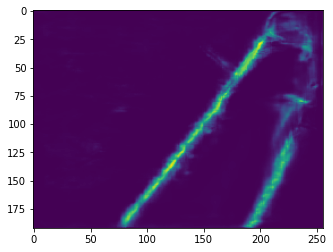

1/1 [==============================] - 0s 16ms/step


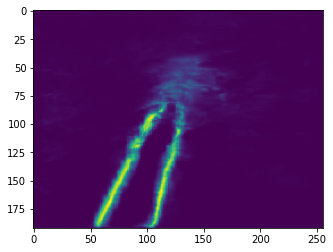

1/1 [==============================] - 0s 16ms/step


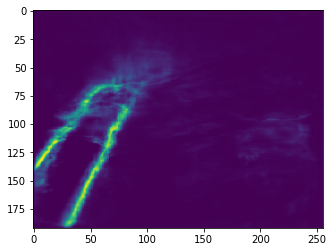

1/1 [==============================] - 0s 16ms/step


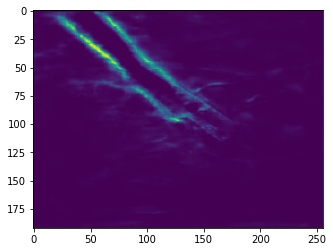

1/1 [==============================] - 0s 16ms/step


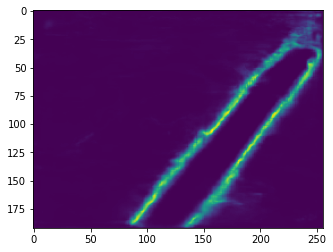

1/1 [==============================] - 0s 15ms/step


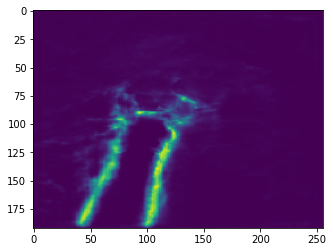

1/1 [==============================] - 0s 21ms/step


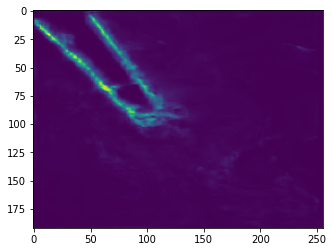

1/1 [==============================] - 0s 19ms/step


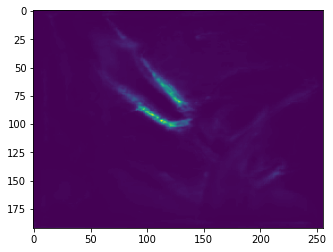

1/1 [==============================] - 0s 16ms/step


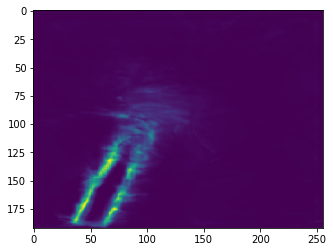

1/1 [==============================] - 0s 20ms/step


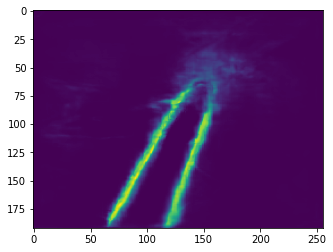

1/1 [==============================] - 0s 20ms/step


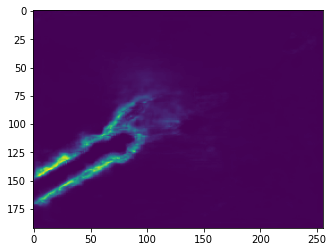

1/1 [==============================] - 0s 16ms/step


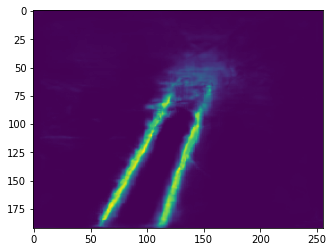

1/1 [==============================] - 0s 16ms/step


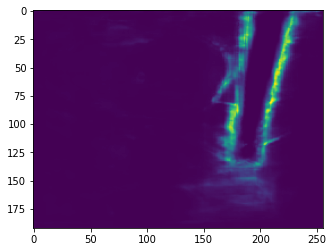

1/1 [==============================] - 0s 16ms/step


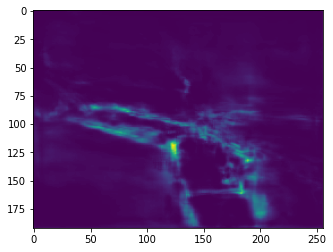

1/1 [==============================] - 0s 16ms/step


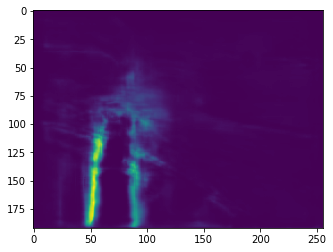

1/1 [==============================] - 0s 16ms/step


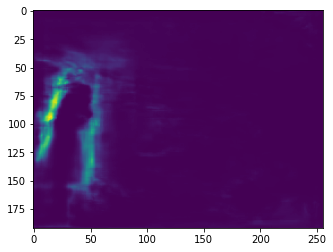

1/1 [==============================] - 0s 16ms/step


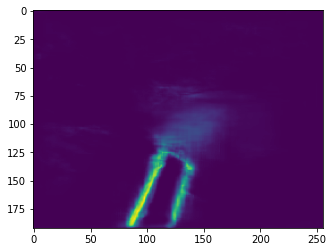

1/1 [==============================] - 0s 17ms/step


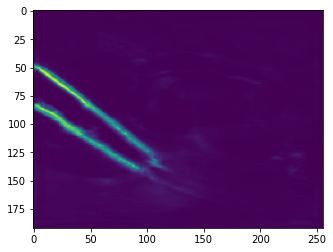

1/1 [==============================] - 0s 16ms/step


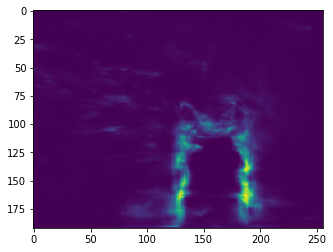

1/1 [==============================] - 0s 15ms/step


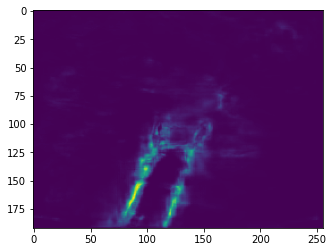

1/1 [==============================] - 0s 20ms/step


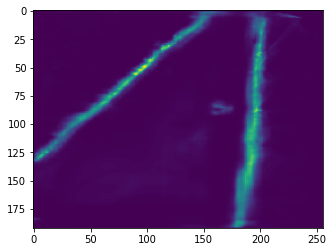

1/1 [==============================] - 0s 21ms/step


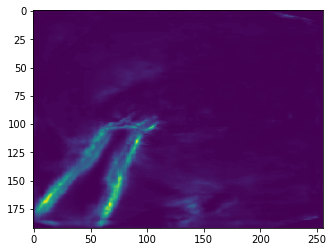

1/1 [==============================] - 0s 20ms/step


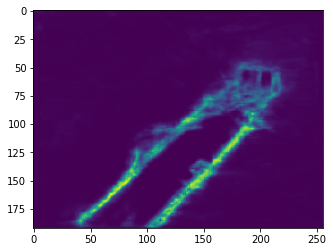

1/1 [==============================] - 0s 20ms/step


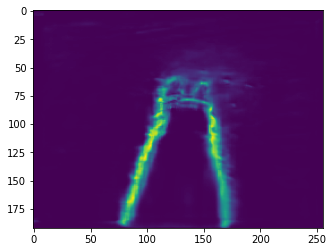

1/1 [==============================] - 0s 20ms/step


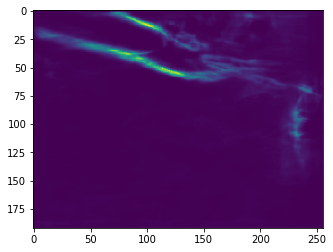

1/1 [==============================] - 0s 19ms/step


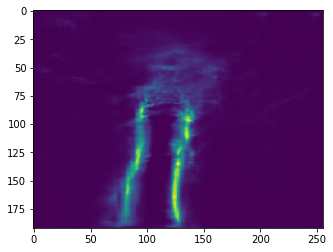

1/1 [==============================] - 0s 16ms/step


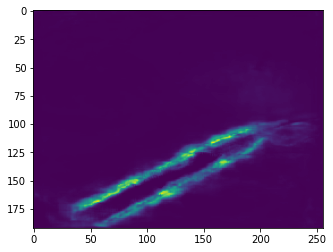

1/1 [==============================] - 0s 15ms/step


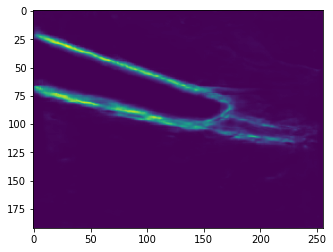

1/1 [==============================] - 0s 15ms/step


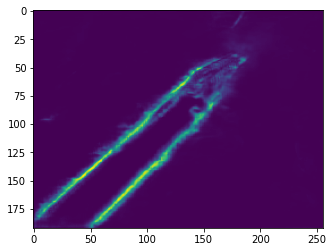

1/1 [==============================] - 0s 15ms/step


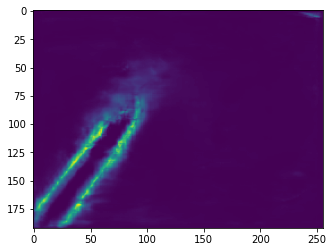

1/1 [==============================] - 0s 15ms/step


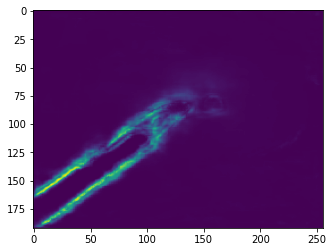

1/1 [==============================] - 0s 22ms/step


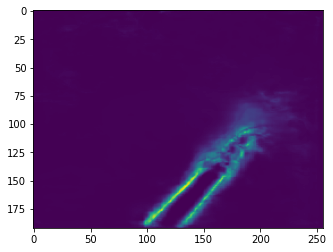

1/1 [==============================] - 0s 21ms/step


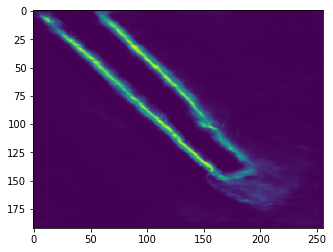

1/1 [==============================] - 0s 15ms/step


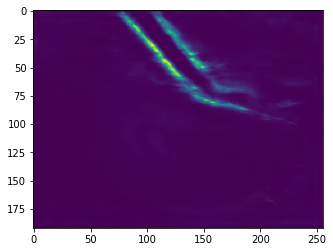

1/1 [==============================] - 0s 16ms/step


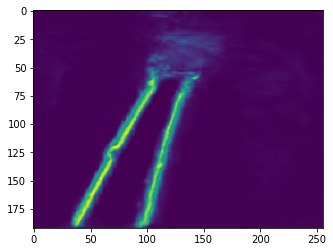

1/1 [==============================] - 0s 16ms/step


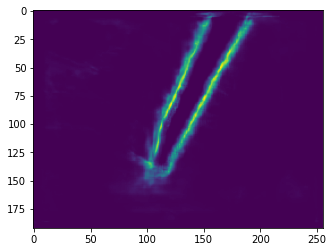

1/1 [==============================] - 0s 16ms/step


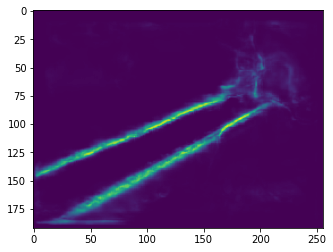

1/1 [==============================] - 0s 16ms/step


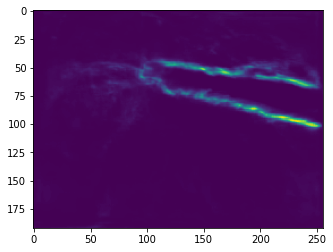

1/1 [==============================] - 0s 15ms/step


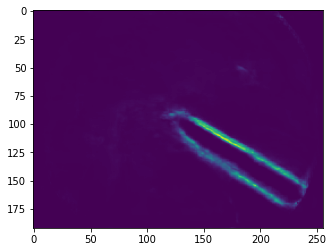

1/1 [==============================] - 0s 16ms/step


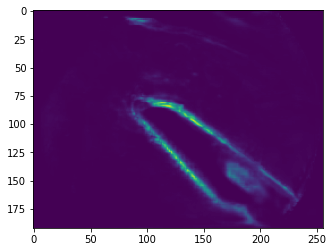

1/1 [==============================] - 0s 15ms/step


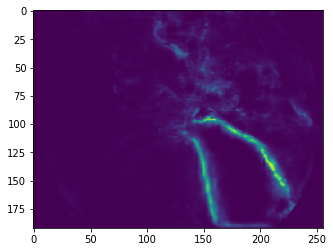

1/1 [==============================] - 0s 17ms/step


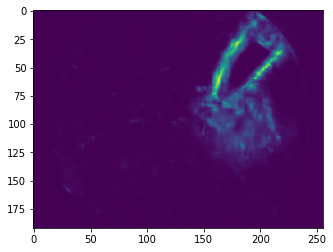

1/1 [==============================] - 0s 20ms/step


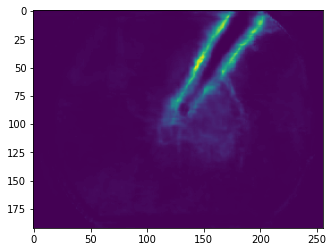

1/1 [==============================] - 0s 20ms/step


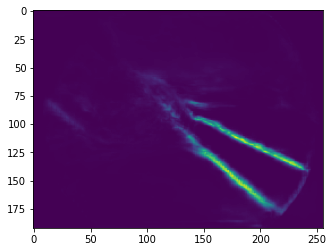

1/1 [==============================] - 0s 15ms/step


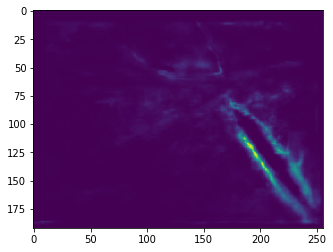

1/1 [==============================] - 0s 16ms/step


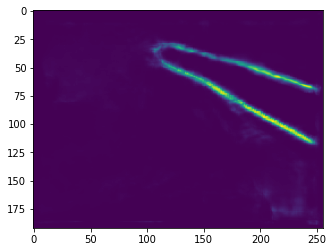

1/1 [==============================] - 0s 15ms/step


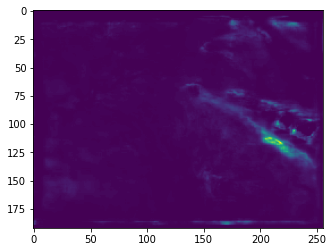

1/1 [==============================] - 0s 15ms/step


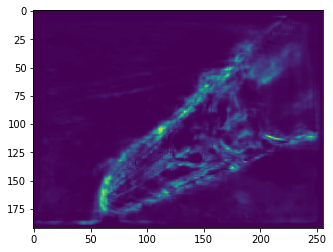

1/1 [==============================] - 0s 16ms/step


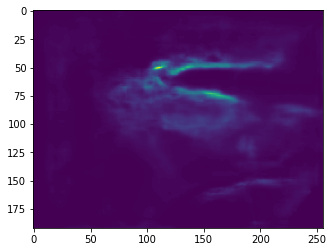

1/1 [==============================] - 0s 16ms/step


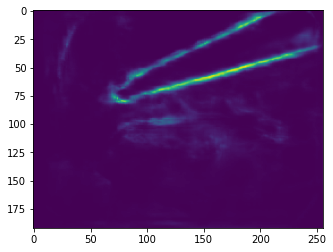

1/1 [==============================] - 0s 16ms/step


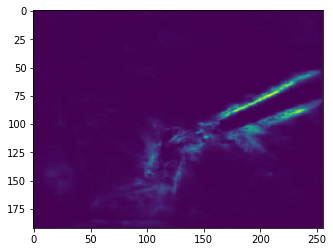

1/1 [==============================] - 0s 20ms/step


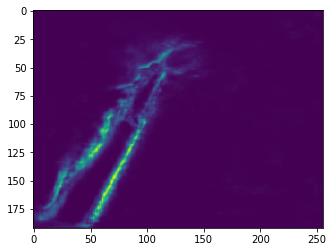

1/1 [==============================] - 0s 18ms/step


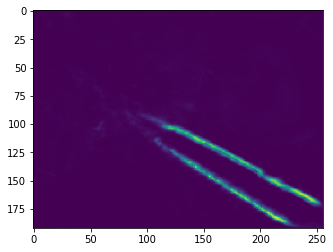

1/1 [==============================] - 0s 16ms/step


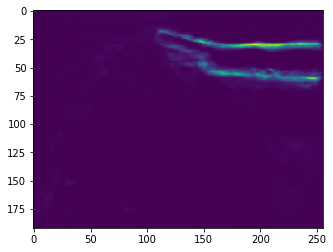

1/1 [==============================] - 0s 20ms/step


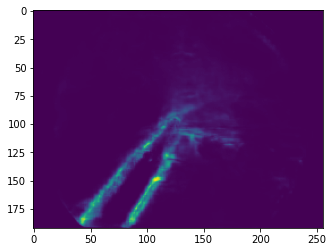

1/1 [==============================] - 0s 21ms/step


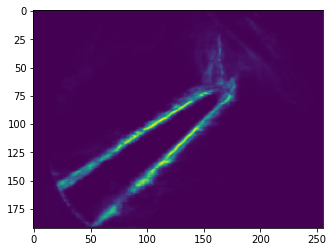

1/1 [==============================] - 0s 16ms/step


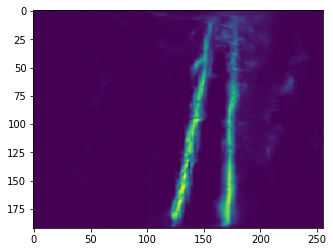

1/1 [==============================] - 0s 15ms/step


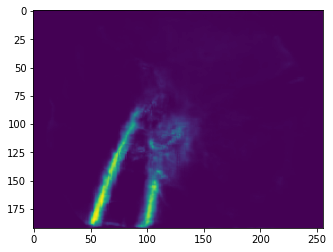

1/1 [==============================] - 0s 16ms/step


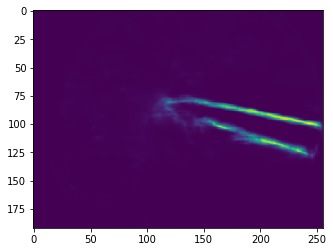

1/1 [==============================] - 0s 15ms/step


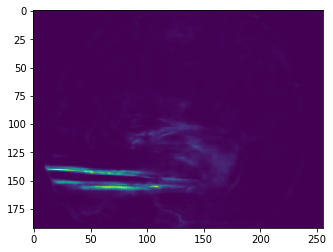

1/1 [==============================] - 0s 15ms/step


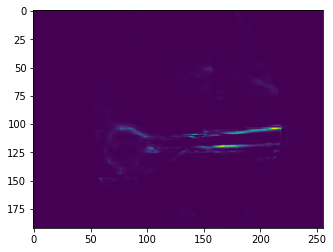

1/1 [==============================] - 0s 15ms/step


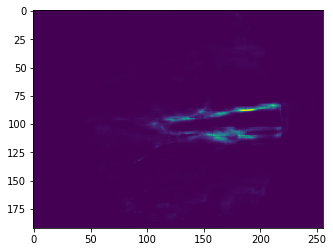

1/1 [==============================] - 0s 15ms/step


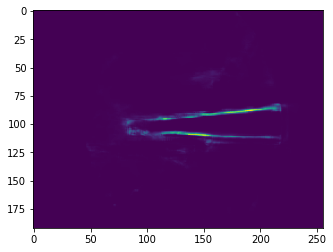

In [5]:
# Setting the current path of this notebook to CurrentDirectory. 
CurrentDirectory=os.getcwd() 

# Read all the '.jpg' images that exist in "Images" directory of the CurrentDirectory. 
TestImages = glob.glob('/home/mahmoud/Desktop/laparoscopic-Tools-Segmentation/DataFinal/Test/Test_Positive/'+"*.png")
TestImages.sort()

# if you want to see that Images are reading correctly, please uncomment this. Uncomment is preferable. 
# print(TestImages)


# Set the directory where you want to save the masks and features. e.g. ToolsMaskLilian in CurrentDirectory. 
MaskSavePath= '/home/mahmoud/Desktop/laparoscopic-Tools-Segmentation/eval/Results2/'

'''
Set the numbers of character in your image name. 
Example: Suppose, your image name is 'image_00001.png', Then
        
         ImageNameLength = 11 
'''

ImageNameLength = 20

for imageName in TestImages:
    
    # Read the image and resize to 192x256 (Heigh x Weight)
    img = cv2.resize(cv2.imread(imageName,-1),(256,192)) 
    
    # Extract the file name and format of the image 
    filename, file_extension = os.path.splitext(imageName)
    
    #Copy the image to temp variable to use later. 
    temp = img.copy()
    
    img=img/img.max()
    
    # Expand the dimension because the model work on the tensor. 
    '''
       For Example: (192, 256, 3) dimensional Image should be (1, 192, 256, 3) dimensional. 
    '''

    img=np.expand_dims(img, axis=0)
    
    # verbose = 1 for the progress bar  and verbose = 0 for the silent mode 
    Prediction =model.predict(img,verbose=1) 
    mask=(255*(Prediction[3].reshape(192,256))).astype(np.uint8)
    plt.imshow(mask)
    plt.show()
    
    
    
    #--------------------------------Save the tool mask-----------------------------------------
    mask=(255*(Prediction[0].reshape(192,256))).astype(np.uint8)

    colour=cv2.merge((mask, mask, mask))
    colour[:,:,0]=0
    colour[:,:,2]=0
    
    overlay_mask=cv2.addWeighted(colour,0.7,temp,0.8,0)
    
    path=MaskSavePath+filename[-ImageNameLength:]+'_tool_mask'+file_extension
    cv2.imwrite(path,mask)
    
    path=MaskSavePath+filename[-ImageNameLength:]+'_tool_overlay'+file_extension
    cv2.imwrite(path,overlay_mask)
    
    
    #--------------------------------Save the mid-line-----------------------------------------
    midLine=(255*(Prediction[1].reshape(192,256))).astype(np.uint8)

    colour=cv2.merge((midLine,midLine,midLine))
    colour[:,:,0]=0
    colour[:,:,2]=0
    
    overlay_midLine=cv2.addWeighted(colour,0.7,temp,0.8,0)
    
    path=MaskSavePath+filename[-ImageNameLength:]+'_midline'+file_extension
    cv2.imwrite(path,midLine)
    
    #path=MaskSavePath+filename[-ImageNameLength:]+'_midline_overlay'+file_extension
    #cv2.imwrite(path,overlay_midLine)
    

    #--------------------------------Save the Tip-Point-----------------------------------------

    tipPoint=(255*(Prediction[2].reshape(192,256))).astype(np.uint8)


    colour=cv2.merge((tipPoint,tipPoint,tipPoint))
    colour[:,:,0]=0
    colour[:,:,2]=0
    
    overlay_tipPoint=cv2.addWeighted(colour,0.7,temp,0.8,0)
    
    path=MaskSavePath+filename[-ImageNameLength:]+'_tipPoint'+file_extension
    cv2.imwrite(path,tipPoint)
    
    #path=MaskSavePath+filename[-ImageNameLength:]+'_tipPoint_overlay'+file_extension
    #cv2.imwrite(path,overlay_tipPoint)   


    #--------------------------------Save the Edge-Line-----------------------------------------
    
    edgeLine=(255*(Prediction[3].reshape(192,256))).astype(np.uint8)
    edgeLine [edgeLine<30] = 0

    colour=cv2.merge((edgeLine,edgeLine,edgeLine))
    colour[:,:,0]=0
    colour[:,:,2]=0
    
    overlay_edgeLine=cv2.addWeighted(colour,0.7,temp,0.8,0)
    
    path=MaskSavePath+filename[-ImageNameLength:]+'_edgeLine'+file_extension
    cv2.imwrite(path,edgeLine)
    
    #path=MaskSavePath+filename[-ImageNameLength:]+'__edgeLine_overlay'+file_extension
    #cv2.imwrite(path,overlay_edgeLine)
       

    #--------------------------------Save the Tool Flag----------------------------------------

    Flag=np.argmax(Prediction[4],axis=1)
    
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (50,50)
    fontScale              = 1
    fontColor              = (0,255,255)
    lineType               = 3
   
    cv2.putText(temp,str(Flag[0]), 
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        lineType)
    cv2.imwrite(MaskSavePath+filename[-ImageNameLength:]+'_FLAG'+file_extension, temp )
    
    
